In [77]:
from tensorflow.keras import layers
from tensorflow.keras import models
from keras.datasets import mnist
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import os

In [78]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


In [79]:
model = models.Sequential()
model.add(layers.Conv2D(32, (5,5), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_66 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_67 (Conv2D)          (None, 10, 10, 64)        18496     
                                                                 
 max_pooling2d_46 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_68 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_18 (Flatten)        (None, 576)             

In [80]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [81]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_images, train_labels, epochs=10, batch_size=64)

test_loss, test_acc = model.evaluate(test_images, test_labels)

print(test_acc)

model.save('mnist.h5')

Epoch 1/10
938/938 [==============================] - 40s 40ms/step - loss: 0.1836 - accuracy: 0.9427
Epoch 2/10
938/938 [==============================] - 37s 39ms/step - loss: 0.0516 - accuracy: 0.9843
Epoch 3/10
938/938 [==============================] - 38s 41ms/step - loss: 0.0379 - accuracy: 0.9883
Epoch 4/10
938/938 [==============================] - 37s 40ms/step - loss: 0.0281 - accuracy: 0.9909
Epoch 5/10
938/938 [==============================] - 38s 41ms/step - loss: 0.0234 - accuracy: 0.9924
Epoch 6/10
938/938 [==============================] - 35s 38ms/step - loss: 0.0194 - accuracy: 0.9938
Epoch 7/10
938/938 [==============================] - 37s 39ms/step - loss: 0.0162 - accuracy: 0.9952
Epoch 8/10
938/938 [==============================] - 37s 39ms/step - loss: 0.0141 - accuracy: 0.9955
Epoch 9/10
938/938 [==============================] - 35s 37ms/step - loss: 0.0126 - accuracy: 0.9957
Epoch 10/10
313/313 [==============================] - 3s 8ms/step - loss: 0.0261 

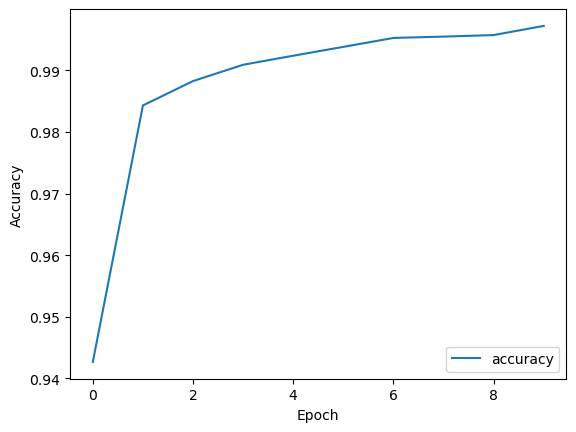

In [83]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()